In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
df = pd.read_excel('Датасет.xlsx')

In [3]:
def find_count(days,station):
    tod = dt.datetime.now()
    d = dt.timedelta(days=days)
    a = (tod - d).replace(hour=0, minute=0, second=0, microsecond=0)
    print(df[station][a])

In [4]:
find_count(19,'Красносельская')

KeyError: datetime.datetime(2024, 4, 1, 0, 0)

In [11]:
df

,Date,Б.Рокоссовского,Черкизовская,Преображенск. пл,Сокольники СЛ,Красносельская,Комсомольск. СЛ,Красные ворота,Чистые пруды,Лубянка,...,Каширская (Зам),Нижегород-я НБС,К,Пыхтино,Аэропорт Внуково,Яхромская,Лианозово,Физтех,Текстильщики СЦ,day_sequence
0,2024-01-01,16671,6248,14094,18651,7391,8883,3067,12873,8554,...,18534,16779,18248,8390,15787,9813,18978,1476,18055,0
1,2024-01-02,15113,5441,1132,10083,19339,15442,7139,11038,15482,...,5763,14810,8141,16045,10257,19663,8499,2893,18422,1
2,2024-01-03,2905,7991,6556,6488,15424,15055,18002,2430,6545,...,6879,1040,10399,18903,13493,12491,2959,9897,14815,2
3,2024-01-04,13998,14864,7265,6409,10725,2531,19411,18152,10221,...,2667,13876,4981,13176,8656,9180,12203,9793,16915,3
4,2024-01-05,12742,10015,4001,9446,5965,7285,9990,7456,9020,...,1577,13691,15525,16827,5761,3563,9070,9822,6052,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2024-03-30,13714,6496,8365,18759,7746,5709,1873,15867,4428,...,15306,15953,3694,14040,19801,14759,5616,3834,13438,89
90,2024-03-31,2561,15991,2811,5573,8936,15712,2772,11590,10987,...,6940,9599,9883,10988,17569,14798,16496,5997,7997,90
91,2024-04-01,11209,7029,5004,15017,11373,5649,10104,4453,5127,...,9394,13688,3650,8035,13950,17189,8603,5933,10796,91
92,2024-04-02,2722,3999,17068,14176,19561,4700,3868,14364,15485,...,10092,18652,10583,11124,7545,3864,16046,4969,11741,92


## Preprocessing

In [9]:
df.fillna(df.mean(),inplace=True)

In [10]:
df['day_sequence'] = range(0,df.shape[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Columns: 326 entries, Date to weekend
dtypes: datetime64[ns](1), float64(15), int32(2), int64(308)
memory usage: 238.8 KB


In [12]:
df['weekday'] = (df['Date'].dt.dayofweek < 5).astype(int)
df['weekend'] = (df['Date'].dt.dayofweek >= 5).astype(int)

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Черкизовская'])

## EDA

##  Train
`

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
import itertools
import statsmodels.api as sm

# Подбор оптимальных параметров ARIMA
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

best_aic = float('inf')
best_order = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = sm.tsa.ARIMA(train_data, order=(p, d, q))
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, d, q)
    except:
        continue

print("Best ARIMA Order:", best_order)

# Обучение ARIMA модели с лучшими параметрами
arima_model = sm.tsa.ARIMA(train_data, order=best_order)
arima_fit = arima_model.fit()

d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\code\hackaton\METRO_bot\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving 

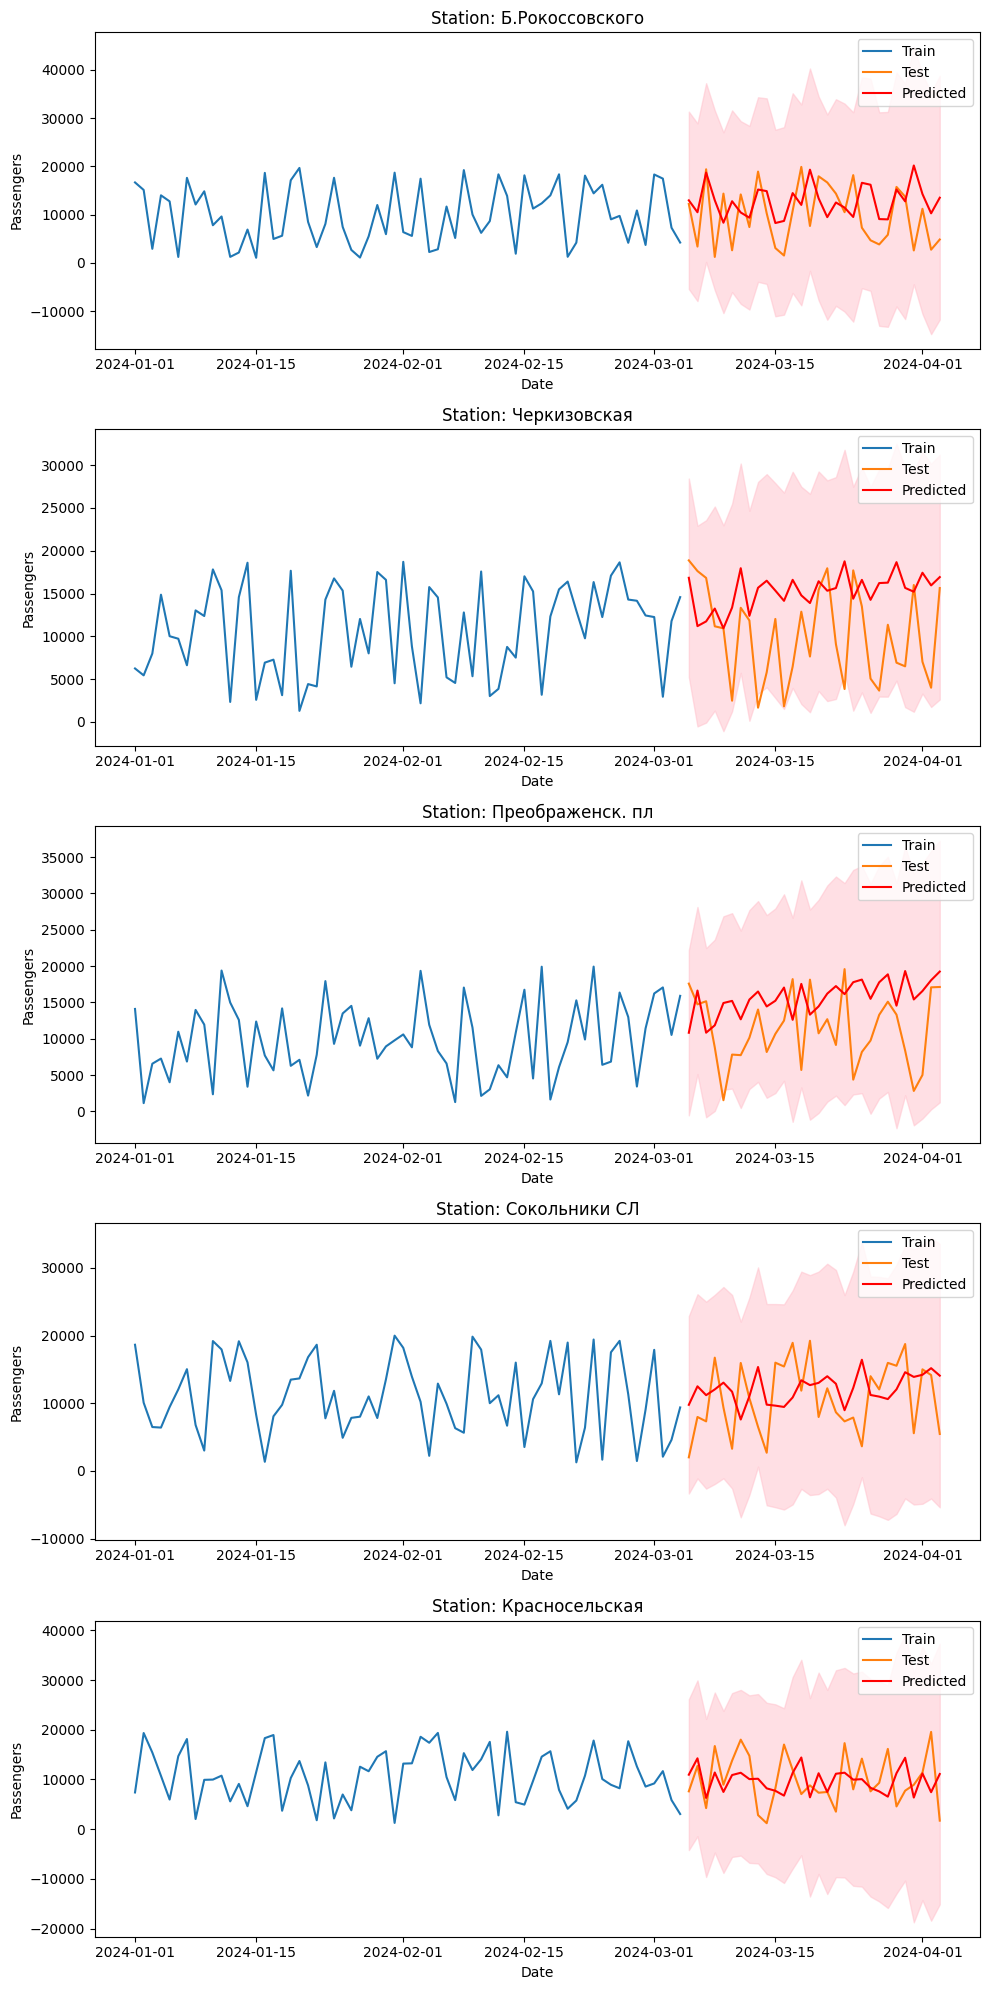

In [ ]:
import matplotlib.pyplot as plt

# Создание подложки для графиков
fig, axes = plt.subplots(len(stations), figsize=(10, 4*len(stations)))

for i, station in enumerate(stations):
    # Разделение данных на обучающий и тестовый наборы
    train, test = data[station].iloc[:-30], data[station].iloc[-30:]

    # Создание и обучение модели SARIMA
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()

    # Прогнозирование
    forecast = model_fit.forecast(30)

    # Получаем фактические и предсказанные значения
    pred = model_fit.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)

    # Построение графика сравнения предсказанных и фактических значений для текущей станции
    axes[i].plot(train.index, train, label='Train')
    axes[i].plot(test.index, test, label='Test')
    axes[i].plot(pred.predicted_mean.index, pred.predicted_mean, color='red', label='Predicted')
    axes[i].fill_between(pred.conf_int().index, pred.conf_int()['lower '+station], pred.conf_int()['upper '+station], color='pink', alpha=0.5)
    axes[i].set_title(f'Station: {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passengers')
    axes[i].legend()

# Размещение графиков
plt.tight_layout()
plt.show()


In [ ]:
df.columns[1:5] 

Index(['Б.Рокоссовского', 'Черкизовская', 'Преображенск. пл', 'Сокольники СЛ'], dtype='object')

MSE for Б.Рокоссовского: 40763872.80576088
MSE for Черкизовская: 43231323.461353436
MSE for Преображенск. пл: 27948092.462483656
MSE for Сокольники СЛ: 32408051.980259813


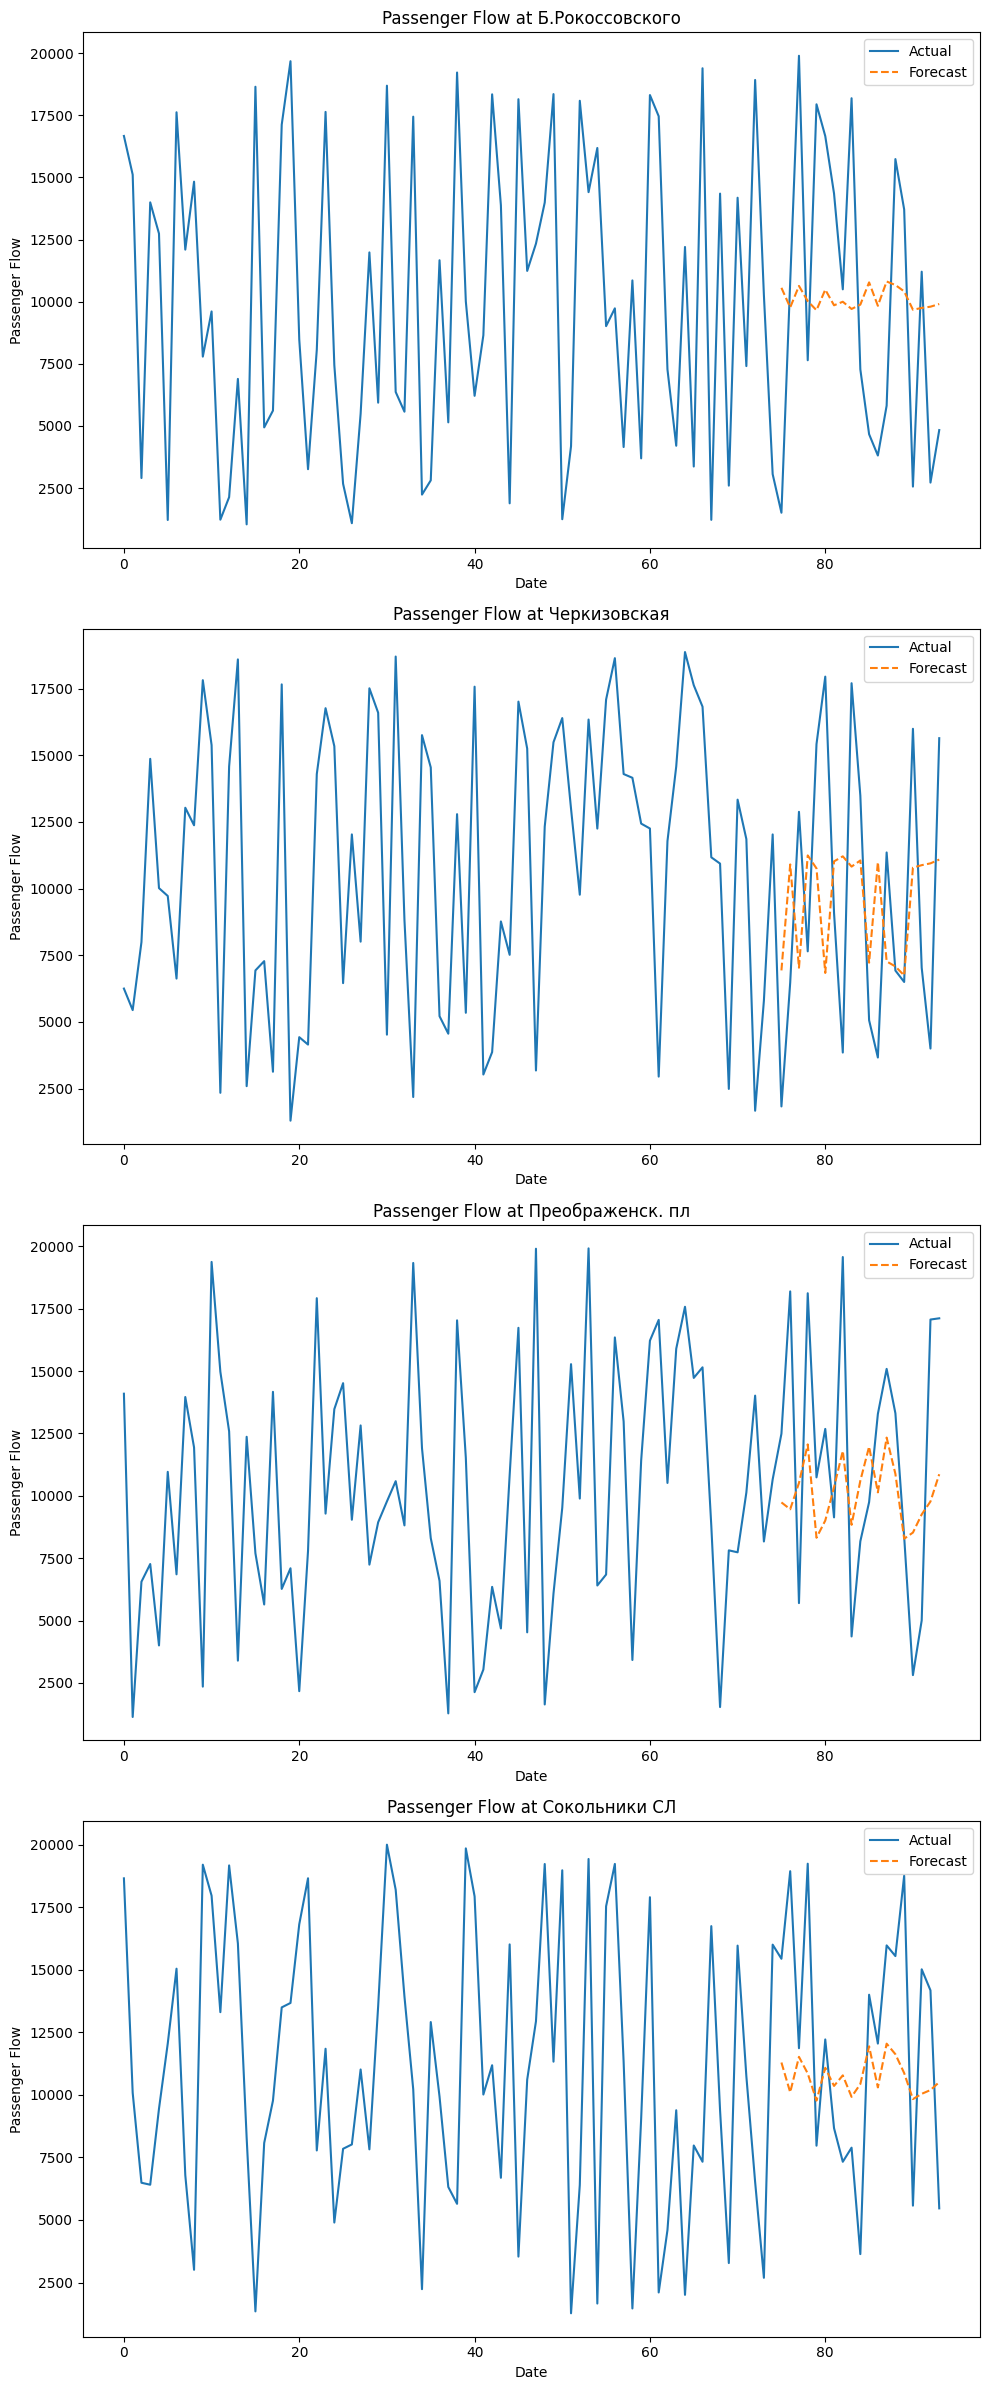

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

# Получаем список станций
stations = df.columns[1:5]  # Первый столбец содержит даты, поэтому начинаем с индекса 1

# Создаем фигуру для графиков
fig, axes = plt.subplots(len(stations), figsize=(10, 6*len(stations)))

# Перебираем каждую станцию
for i, station in enumerate(stations):
    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df[['day_sequence','weekday','weekend']]  # Исключаем столбец с датами и текущую станцию
    y = df[station]

    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создание и обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(X_train, y_train)


    # Прогнозирование на тестовом наборе
    y_pred = model.predict(X_test)

    # Вычисление MSE на тестовом наборе
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for {station}: {mse}")

    # Построение графика фактических и предсказанных значений
    axes[i].plot(df['day_sequence'], y, label='Actual')
    axes[i].plot(df['day_sequence'][-len(y_pred):], y_pred, label='Forecast', linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()

# Размещение графиков
plt.tight_layout()

plt.show()


MSE for Б.Рокоссовского: 56431238.25018948
MSE for Черкизовская: 53056215.11163158
MSE for Преображенск. пл: 40330824.44647368
MSE for Сокольники СЛ: 49788761.15100527


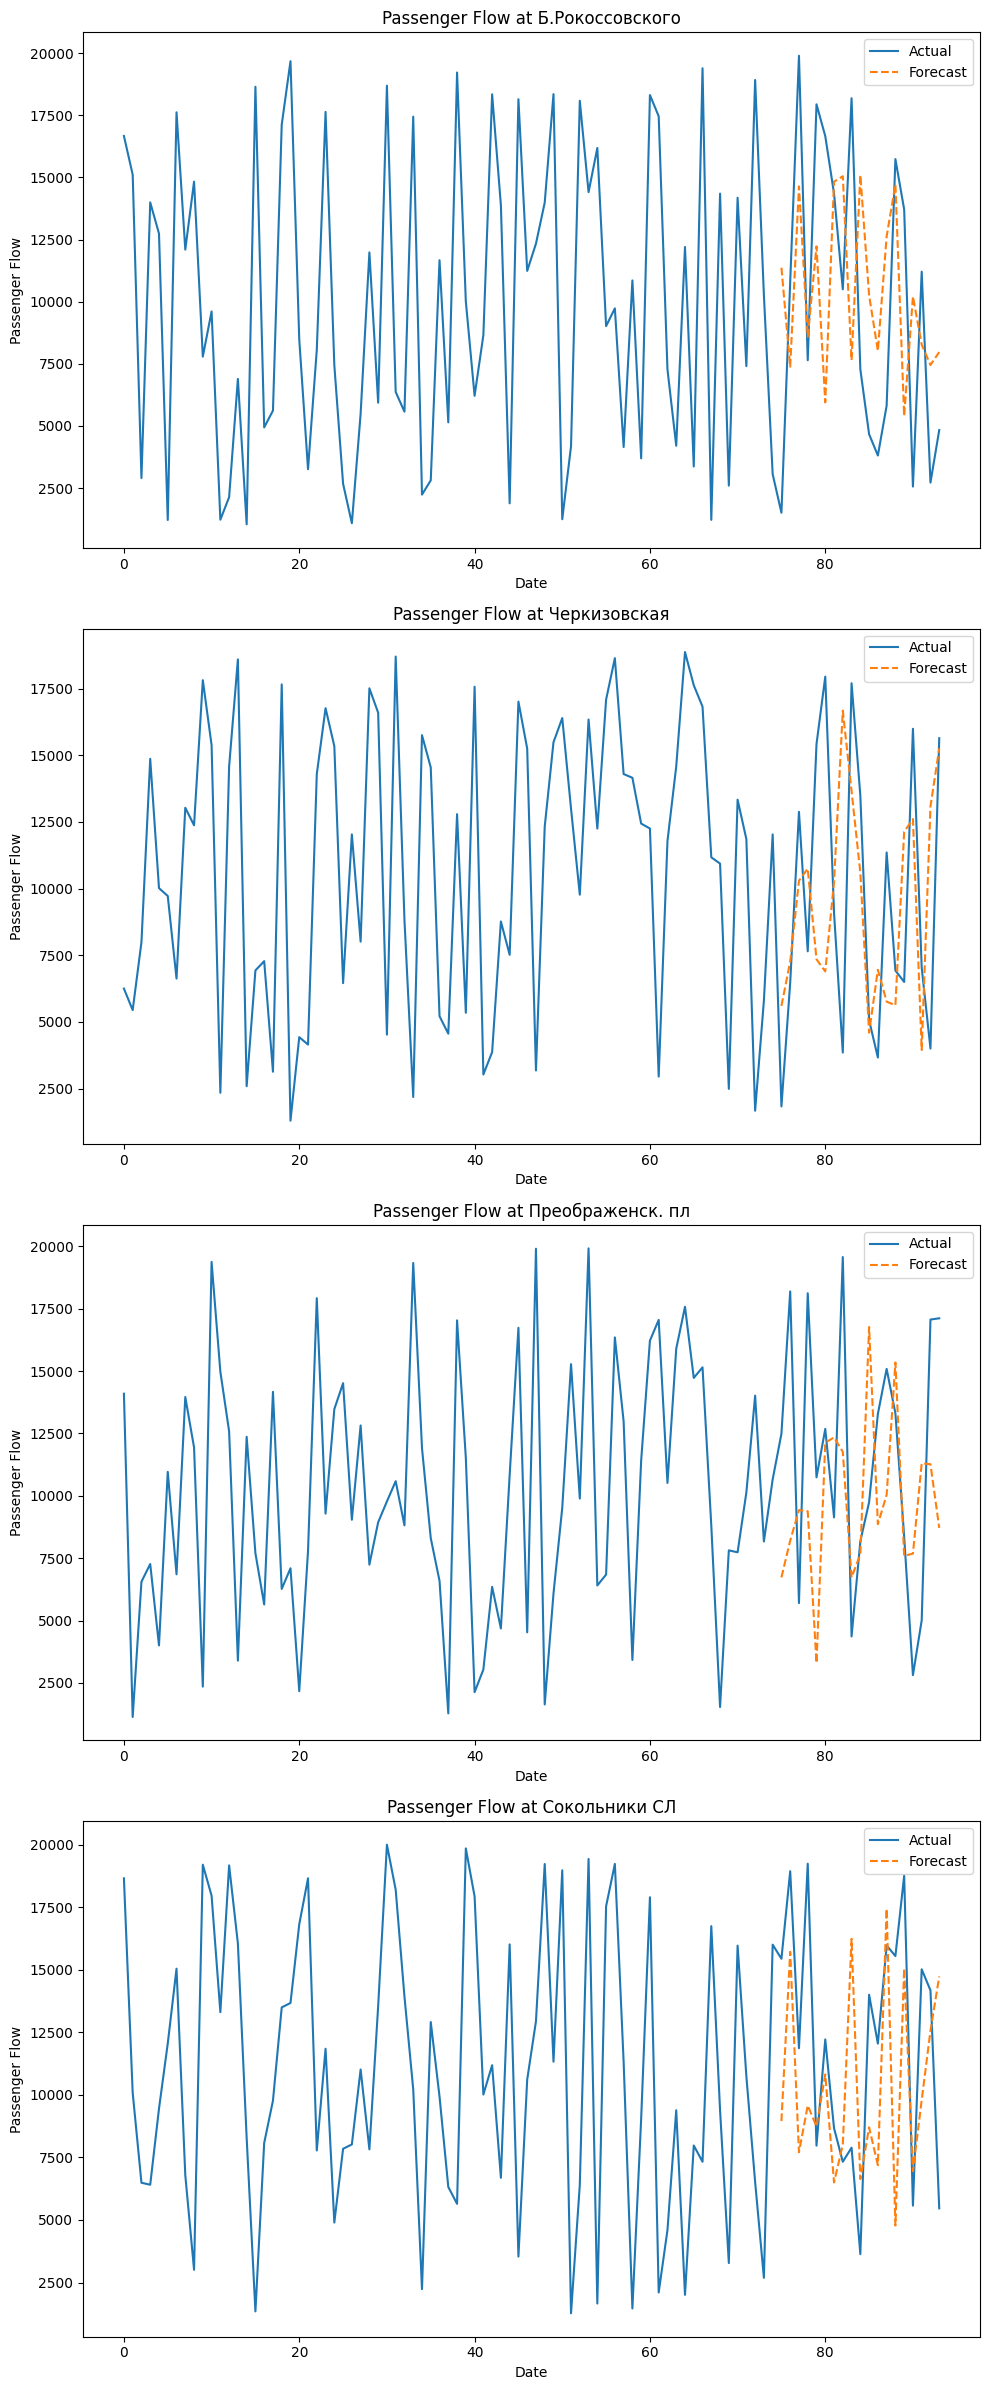

In [15]:

from sklearn.ensemble import RandomForestRegressor

# Получаем список станций
stations = df.columns[1:5]  # Первый столбец содержит даты, поэтому начинаем с индекса 1

# Создаем фигуру для графиков
fig, axes = plt.subplots(len(stations), figsize=(10, 6*len(stations)))

# Перебираем каждую станцию
for i, station in enumerate(stations):
    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df[['day_sequence','weekday','weekend']]  # Исключаем столбец с датами и текущую станцию
    y = df[station]

    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создание и обучение модели линейной регрессии
    model = RandomForestRegressor()
    model.fit(X_train, y_train)


    # Прогнозирование на тестовом наборе
    y_pred = model.predict(X_test)

    # Вычисление MSE на тестовом наборе
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for {station}: {mse}")

    # Построение графика фактических и предсказанных значений
    axes[i].plot(df['day_sequence'], y, label='Actual')
    axes[i].plot(df['day_sequence'][-len(y_pred):], y_pred, label='Forecast', linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()

# Размещение графиков
plt.tight_layout()

plt.show()


Learning rate set to 0.027192
0:	learn: 5905.0880314	total: 499us	remaining: 499ms
1:	learn: 5902.9230286	total: 711us	remaining: 355ms
2:	learn: 5888.4958068	total: 1.07ms	remaining: 355ms
3:	learn: 5888.1817675	total: 1.19ms	remaining: 297ms
4:	learn: 5877.3960752	total: 1.52ms	remaining: 303ms
5:	learn: 5871.7069813	total: 1.85ms	remaining: 307ms
6:	learn: 5871.1085919	total: 1.99ms	remaining: 283ms
7:	learn: 5865.0744078	total: 2.25ms	remaining: 279ms
8:	learn: 5863.5969333	total: 2.47ms	remaining: 272ms
9:	learn: 5852.6596181	total: 12.2ms	remaining: 1.2s
10:	learn: 5852.4231947	total: 12.3ms	remaining: 1.11s
11:	learn: 5846.0910231	total: 12.5ms	remaining: 1.03s
12:	learn: 5837.3131390	total: 13.1ms	remaining: 997ms
13:	learn: 5834.9593160	total: 13.3ms	remaining: 938ms
14:	learn: 5831.3053139	total: 13.6ms	remaining: 892ms
15:	learn: 5828.5048739	total: 13.8ms	remaining: 846ms
16:	learn: 5820.3670471	total: 14.1ms	remaining: 814ms
17:	learn: 5813.6192866	total: 14.4ms	remaining:

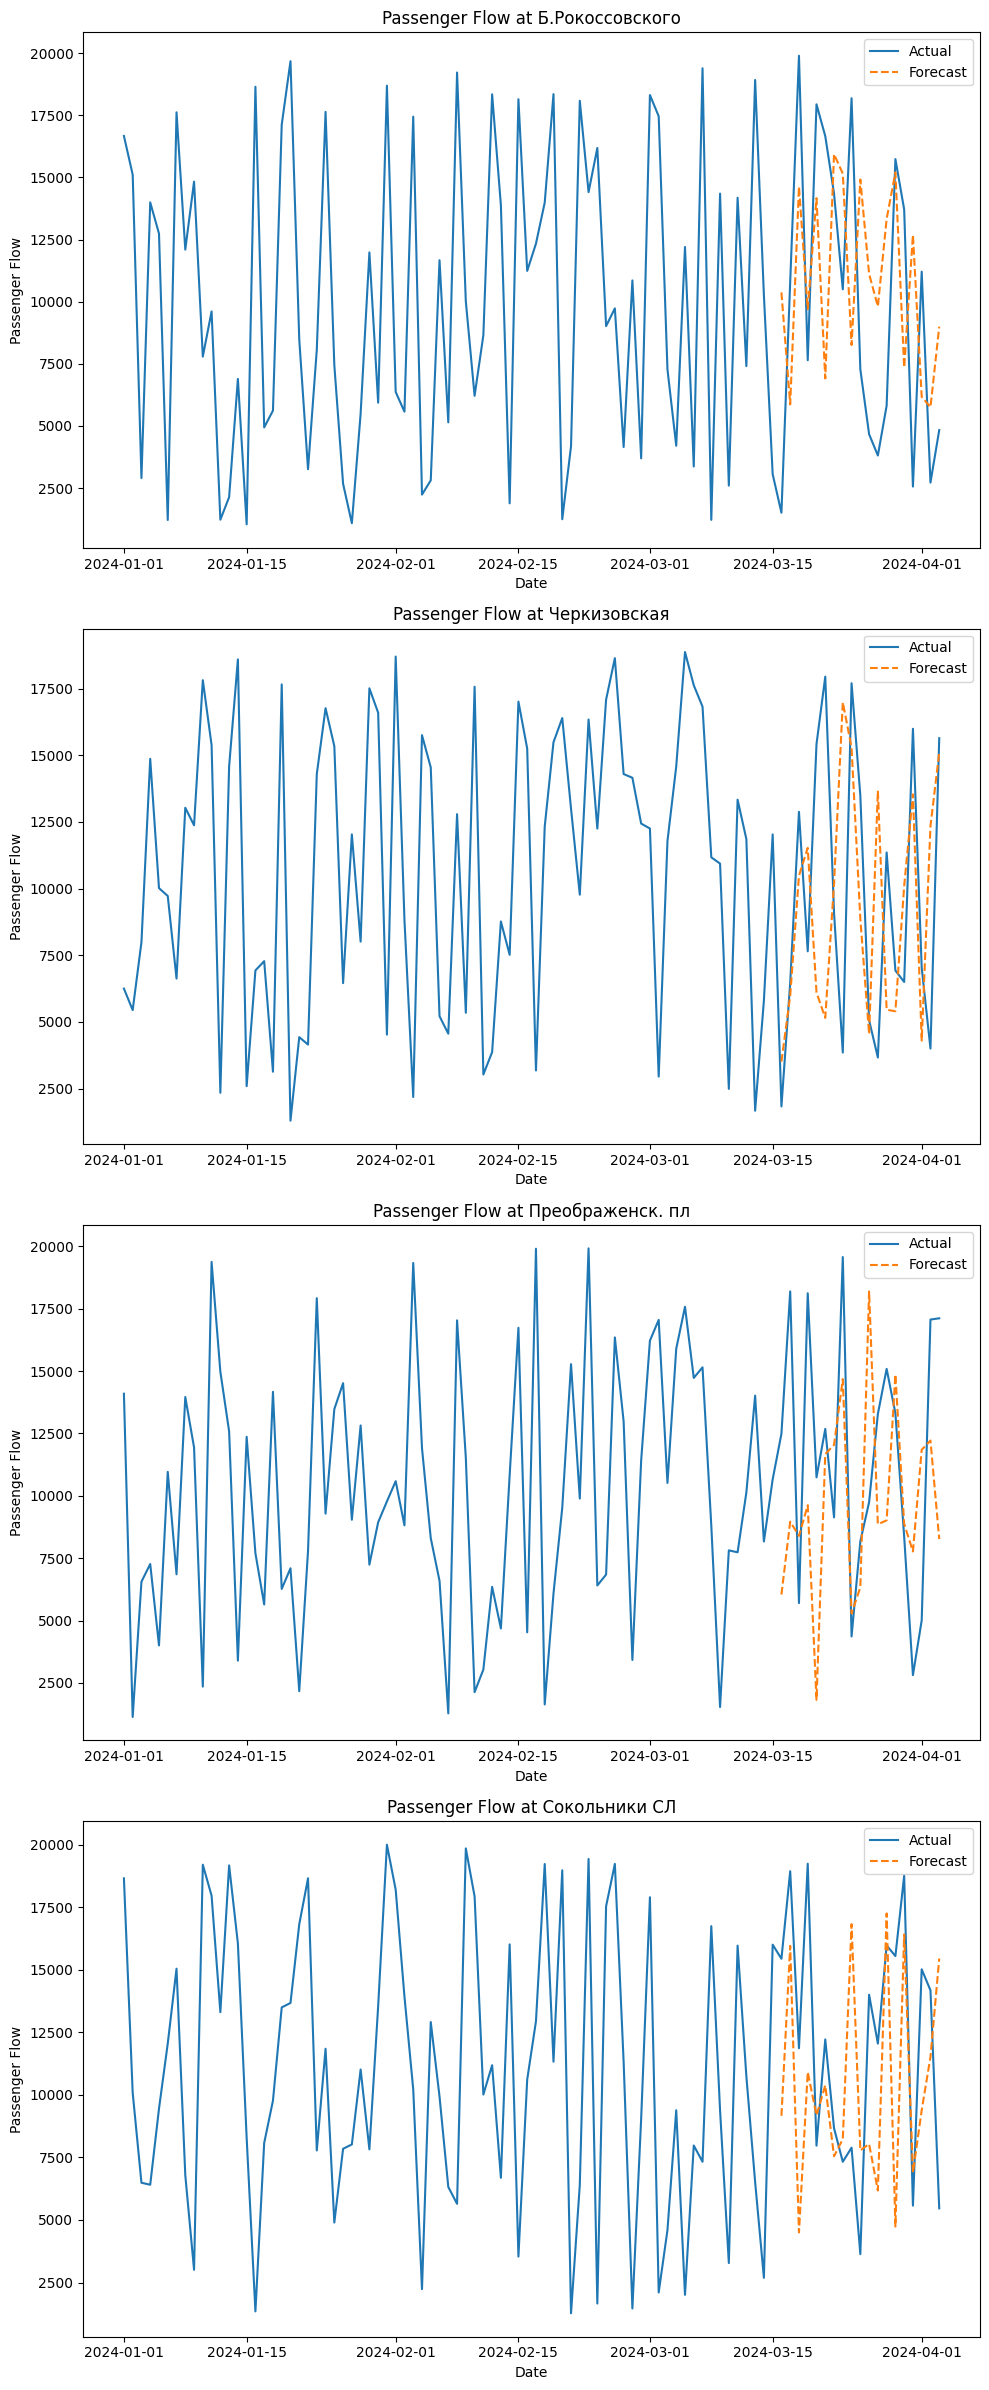

In [18]:

from catboost import CatBoostRegressor

# Получаем список станций
stations = df.columns[1:5]  # Первый столбец содержит даты, поэтому начинаем с индекса 1

# Создаем фигуру для графиков
fig, axes = plt.subplots(len(stations), figsize=(10, 6*len(stations)))

# Перебираем каждую станцию
for i, station in enumerate(stations):
    # Разделение данных на признаки (X) и целевую переменную (y)
    X = df[['day_sequence','weekday','weekend']]  # Исключаем столбец с датами и текущую станцию
    y = df[station]

    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создание и обучение модели линейной регрессии
    model = CatBoostRegressor()
    model.fit(X_train, y_train)


    # Прогнозирование на тестовом наборе
    y_pred = model.predict(X_test)

    # Вычисление MSE на тестовом наборе
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for {station}: {mse}")

    # Построение графика фактических и предсказанных значений
    axes[i].plot(df['Date'], y, label='Actual')
    axes[i].plot(df['Date'][-len(y_pred):], y_pred, label='Forecast', linestyle='--')
    axes[i].set_title(f'Passenger Flow at {station}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Passenger Flow')
    axes[i].legend()

# Размещение графиков
plt.tight_layout()

plt.show()


In [17]:
model.predict(95)

CatBoostError: Invalid data type=<class 'int'> : must be list, numpy.ndarray, pandas.Series, pandas.DataFrame, scipy.sparse matrix, catboost.FeaturesData or catboost.Pool